In [6]:
import numpy as np
from cosmology import Cosmology
from scipy.interpolate import InterpolatedUnivariateSpline
from powerspectra import Powerspectra
import matplotlib.pyplot as plt
from modecoupling import Modecoupling
cosmo = Cosmology()
power = Powerspectra()

plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

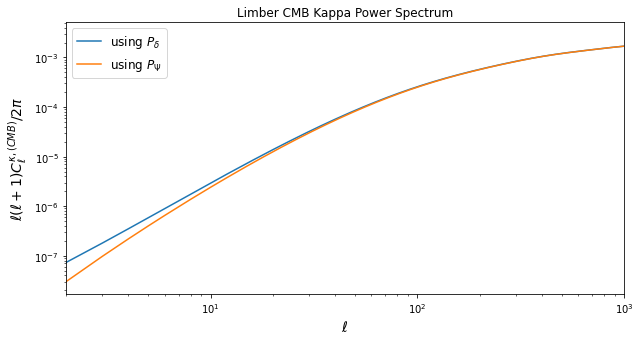

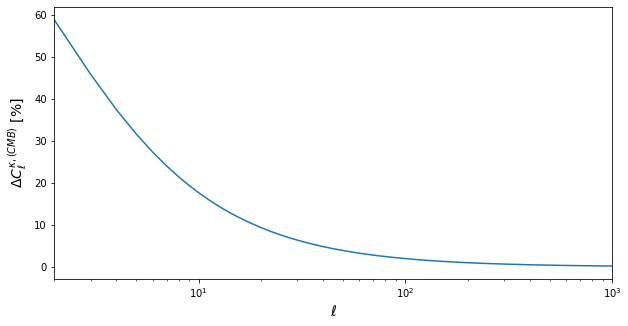

In [20]:
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)

kappa_ps_matter = power.get_kappa_ps(ells, extended=True, Nchi=1000, use_weyl=False)
plt.loglog(ells, kappa_ps_matter*(ells*(ells + 1))/(2*np.pi), label="using $P_{\delta}$")


kappa_ps = power.get_kappa_ps(ells, extended=True, Nchi=1000)
plt.loglog(ells, kappa_ps*(ells*(ells + 1))/(2*np.pi), label="using $P_{\Psi}$")
plt.title("Limber CMB Kappa Power Spectrum")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{\kappa, (CMB)}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(2e0, 1e3)
plt.legend(prop={'size': 12})

plt.figure()
diff = (kappa_ps_matter-kappa_ps)/kappa_ps_matter * 100
plt.semilogx(ells, diff)
plt.xlim(2e0, 1e3)
plt.ylabel("$\Delta C_{\ell}^{\kappa, (CMB)}$ [%]", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.show()

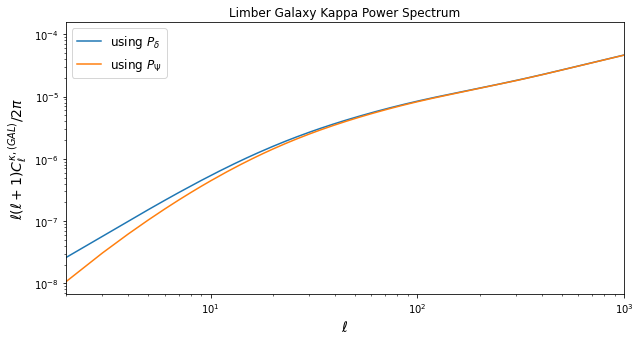

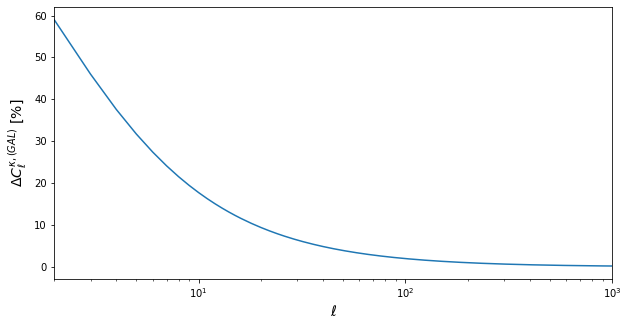

In [21]:
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)

gal_lens_ps_matter = power.get_gal_lens_ps(ells, extended=True, Nchi=1000, use_weyl=False)
plt.loglog(ells, gal_lens_ps_matter*(ells*(ells + 1))/(2*np.pi), label="using $P_{\delta}$")


gal_lens_ps = power.get_gal_lens_ps(ells, extended=True, Nchi=1000)
plt.loglog(ells, gal_lens_ps*(ells*(ells + 1))/(2*np.pi), label="using $P_{\Psi}$")
plt.title("Limber Galaxy Kappa Power Spectrum")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{\kappa, (GAL)}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(2e0, 1e3)
plt.legend(prop={'size': 12})

plt.figure()
diff = (gal_lens_ps_matter-gal_lens_ps)/gal_lens_ps_matter * 100
plt.semilogx(ells, diff)
plt.xlim(2e0, 1e3)
plt.ylabel("$\Delta C_{\ell}^{\kappa, (GAL)}$ [%]", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.show()

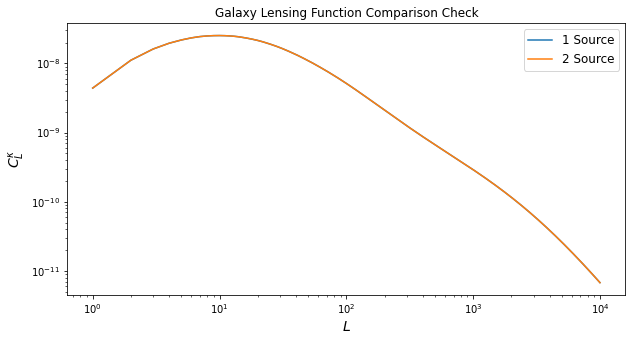

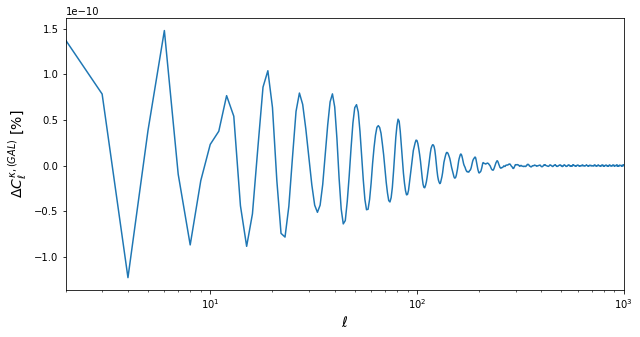

In [32]:
ells = np.arange(1, 10000, 1)
zmax = 5
Cl_kappa1 = power.get_gal_lens_ps(ells, zmax=zmax)
Cl_kappa2 = power.get_gal_lens_ps_2source(ells, cosmo.z_to_Chi(zmax))

plt.figure()
plt.loglog(ells, Cl_kappa1, label="1 Source")
plt.loglog(ells, Cl_kappa2, label="2 Source")
plt.title("Galaxy Lensing Function Comparison Check")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}$", fontsize=14)
plt.legend(prop={'size': 12})

plt.figure()
diff = (Cl_kappa1-Cl_kappa2)/Cl_kappa1 * 100
plt.semilogx(ells, diff)
plt.xlim(2e0, 1e3)
plt.ylabel("$\Delta C_{\ell}^{\kappa, (GAL)}$ [%]", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.show()

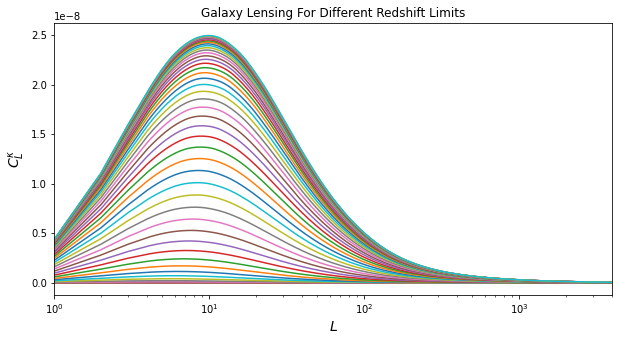

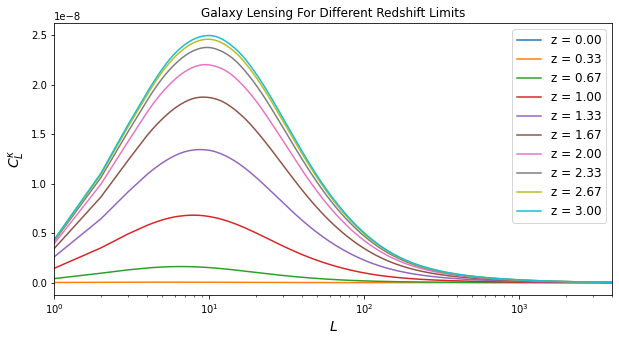

In [53]:
ells = np.concatenate((np.arange(1,4),np.logspace(0, 3, 200)*4))
zs = np.linspace(0, 3, 50)
for z in zs:
    Cl_kappa = power.get_gal_lens_ps(ells, zmax=z)
    plt.semilogx(ells, Cl_kappa, label=f"z = {z}")

plt.title("Galaxy Lensing For Different Redshift Limits")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}$", fontsize=14)
plt.xlim(1e0,4e3)

plt.figure()
zs = np.linspace(0, 3, 10)
for z in zs:
    Cl_kappa = power.get_gal_lens_ps(ells, zmax=z)
    plt.semilogx(ells, Cl_kappa, label=f"z = {z:.2f}")

plt.title("Galaxy Lensing For Different Redshift Limits")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}$", fontsize=14)
plt.xlim(1e0,4e3)
plt.legend(prop={'size': 12})
plt.show()

In [119]:
mode = Modecoupling()
ells1 = np.logspace(0, 4, 200)
ells2 = ells1
%time M = mode.components(ells1, ells2, Nchi=100, typ="rr", star=False, zmax=2)

CPU times: user 1min 16s, sys: 16.4 s, total: 1min 33s
Wall time: 16.5 s


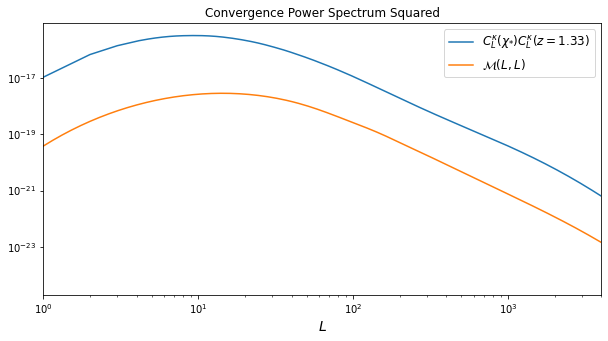

In [121]:
ells = np.concatenate((np.arange(1,4),np.logspace(0, 3, 200)*4))
Cl_kappa1 = power.get_gal_lens_ps_2source(ells, cosmo.get_chi_star())
Cl_kappa2 = power.get_gal_lens_ps_2source(ells, cosmo.z_to_Chi(1.33))

plt.figure()
plt.loglog(ells, Cl_kappa1*Cl_kappa2, label="$C_L^{\kappa}(\chi _{*})C_L^{\kappa}(z=1.33)$")
plt.loglog(ells1, M, label="$\mathcal{M}(L,L)$")
plt.title("Convergence Power Spectrum Squared")
plt.xlabel("$L$", fontsize=14)
plt.xlim(1e0,4e3)
plt.legend(prop={'size': 12})

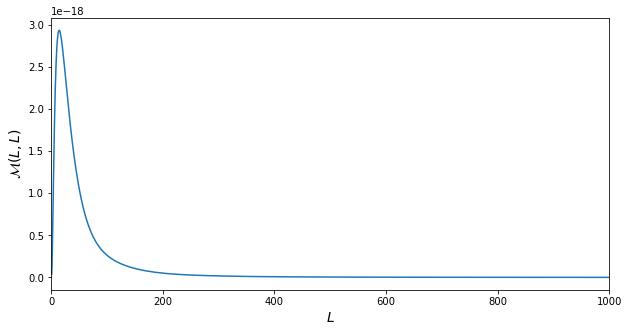

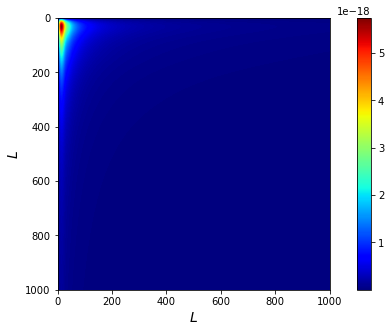

In [123]:
plt.plot(ells1, M, label="$\mathcal{M}(L,L)$")
plt.xlim(0,1000)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)
plt.xlabel("$L$", fontsize=14)
plt.figure()
ells = np.load("cache/_M/rr/8000_100/ells.npy")
M_cache = np.load("cache/_M/rr/8000_100/M.npy")
M_spline = mode.spline(ells,M_cache)
L_sample = np.arange(0, 8001)
M_8000 = M_spline(L_sample,L_sample)
plt.imshow(M_8000, cmap="jet")
plt.colorbar()
plt.xlim(0, 1000)
plt.ylim(1000, 0)
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$L$", fontsize=14)
plt.show()

In [105]:
import random
def diff_test(spline, N=1000, ellmin=1, ellmax=1000):
    diffs = np.ones(N)
    for iii in range(N):
        ell1 = random.randint(1, 1000)
        ell2 = random.randint(1, 1000)
        spline_comp = spline(ell1, ell2)[0][0]
        true_comp = mode.components(ell1, ell2, "rr")[0]
        diffs[iii] = np.abs(spline_comp - true_comp)/true_comp
    print(f"Deviation: mean = {np.mean(diffs) * 100:.4f}%, median = {np.median(diffs) * 100:.6f}%, std = {np.std(diffs) * 100:.2f}%")


In [107]:
diff_test(M_spline, N=10, ellmin=1, ellmax=1000)
diff_test(M_spline, N=10, ellmin=1, ellmax=8000)
diff_test(M_spline, N=10, ellmin=7000, ellmax=8000)

Deviation: mean = 0.0106%, median = 0.000211%, std = 0.02%
Deviation: mean = 0.0111%, median = 0.000241%, std = 0.03%
Deviation: mean = 0.0005%, median = 0.000216%, std = 0.00%


In [139]:
from fisher import Fisher
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher = Fisher(N0_file, N0_offset=2, N0_ell_factors=True)

In [126]:
ells = np.logspace(0, 3, 50)*4
Cl_cmb_rot = fisher.get_postborn_omega_ps(ells, "cache/_M")

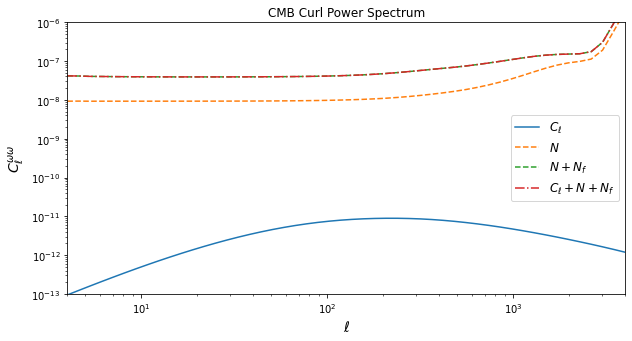

In [146]:
Lmax = 4000

N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
fisher = Fisher(N0_file, N0_offset=2, N0_ell_factors=True)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(4001),fisher.noise.get_N0("curl", ellmax=Lmax, tidy=True, ell_factors=True))
plt.loglog(ells, Cl_cmb_rot, label="$C_{\ell}$")
plt.loglog(ells,N_ww_spline(ells), label="$N$", linestyle="--")

N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
fisher.reset_noise(N0_file, N0_offset=2, N0_ell_factors=True)
N_ww_spline = InterpolatedUnivariateSpline(np.arange(4001),fisher.noise.get_N0("curl", ellmax=Lmax, tidy=True, ell_factors=False))
plt.loglog(ells, N_ww_spline(ells), label="$N + N_f$",linestyle="--")
plt.loglog(ells, Cl_cmb_rot + N_ww_spline(ells), label="$C_{\ell} + N + N_f$",linestyle="dashdot")

plt.legend(prop={'size': 12})
plt.title("CMB Curl Power Spectrum")
plt.ylabel("$C_{\ell}^{\omega\omega}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.ylim(1e-13, 1e-6)
plt.xlim(4e0, 4e3)
plt.show()

In [144]:
Cl_gal_rot = fisher.get_postborn_omega_ps(ells, "cache/_M", cmb=False)

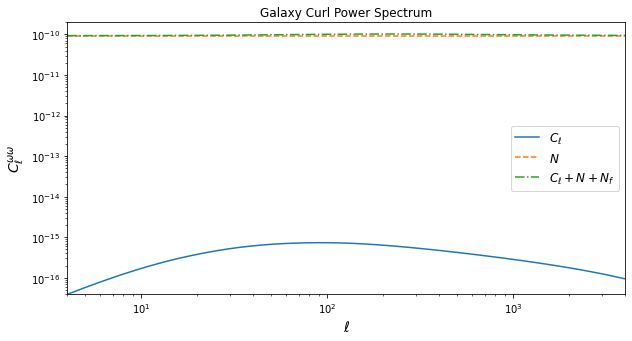

In [156]:
Lmax = 4000

plt.loglog(ells, Cl_gal_rot, label="$C_{\ell}$")
N_rr = fisher.noise.get_shape_N()
plt.loglog(ells,np.ones(np.size(ells))*N_rr[0], label="$N$", linestyle="--")
plt.loglog(ells, Cl_cmb_rot + np.ones(np.size(ells))*N_rr[0], label="$C_{\ell} + N + N_f$",linestyle="dashdot")

plt.legend(prop={'size': 12})
plt.title("Galaxy Curl Power Spectrum")
plt.ylabel("$C_{\ell}^{\omega\omega}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(4e0, 4e3)
plt.ylim(4e-17, 2e-10)
plt.show()

In [155]:
print("Fisher forecast for shear rotation")
F = fisher.get_rotation_ps_Fisher(4000, M_path="cache/_M", f_sky=1, auto=True, cmb=False)
print(f"S/N auto = {np.sqrt(F)}")
F = fisher.get_rotation_ps_Fisher(4000, M_path="cache/_M", f_sky=1, auto=False, cmb=False)
print(f"S/N cross = {np.sqrt(F)}")

Fisher forecast for shear rotation
S/N auto = 0.005310838094709579
S/N cross = 5.199569729732719
